In [ ]:
import pandas as pd
import numpy as np

import os
import sys

import librosa as lr
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from IPython.display import Audio

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
! pip install -q kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
! kaggle datasets download dmitrybabko/speech-emotion-recognition-en
! unzip speech-emotion-recognition-en.zip

Streaming output truncated to the last 5000 lines.
  inflating: Crema/1088_IWW_FEA_XX.wav  
  inflating: Crema/1088_IWW_HAP_XX.wav  
  inflating: Crema/1088_IWW_NEU_XX.wav  
  inflating: Crema/1088_IWW_SAD_XX.wav  
  inflating: Crema/1088_MTI_ANG_XX.wav  
  inflating: Crema/1088_MTI_DIS_XX.wav  
  inflating: Crema/1088_MTI_FEA_XX.wav  
  inflating: Crema/1088_MTI_HAP_XX.wav  
  inflating: Crema/1088_MTI_NEU_XX.wav  
  inflating: Crema/1088_MTI_SAD_XX.wav  
  inflating: Crema/1088_TAI_ANG_XX.wav  
  inflating: Crema/1088_TAI_DIS_XX.wav  
  inflating: Crema/1088_TAI_FEA_XX.wav  
  inflating: Crema/1088_TAI_HAP_XX.wav  
  inflating: Crema/1088_TAI_NEU_XX.wav  
  inflating: Crema/1088_TAI_SAD_XX.wav  
  inflating: Crema/1088_TIE_ANG_XX.wav  
  inflating: Crema/1088_TIE_DIS_XX.wav  
  inflating: Crema/1088_TIE_FEA_XX.wav  
  inflating: Crema/1088_TIE_HAP_XX.wav  
  inflating: Crema/1088_TIE_NEU_XX.wav  
  inflating: Crema/1088_TIE_SAD_XX.wav  
  inflating: Crema/1088_TSI_ANG_XX.wav  
  infl

In [ ]:
def LoadAudio(Crema):
    emotions = []
    Audio_List=[]
    samp_freq=[]
    paths = []

    for wav in os.listdir(Crema):
        path=Crema+"/"+wav
        paths.append(path)
        audio,sampling_freq=lr.load(path,sr=8000)
        yt, index = lr.effects.trim(audio, top_db=60)       
        
        if len(yt) > (2*8000):
            yt = yt[:2*8000]
        else:
            padding = (2*8000) - len(yt)
            offset = padding // 2
            yt = np.pad(yt, (offset,2*8000- len(yt) - offset), 'constant')

        mean = np.mean(yt)
        std = np.std(yt)
        out = np.ones( (len(yt)) ) 
        yt= np.divide((yt - mean),std,out=out, where=std!=0)

        Audio_List.append(yt)
        samp_freq.append(sampling_freq)

        info = wav.partition(".wav")[0].split("_")
        if info[2] == 'SAD':
            emotions.append(0)
        elif info[2] == 'ANG':
            emotions.append(1)
        elif info[2] == 'DIS':
            emotions.append(2)
        elif info[2] == 'FEA':
            emotions.append(3)
        elif info[2] == 'HAP':
            emotions.append(4)
        elif info[2] == 'NEU':
            emotions.append(5)
        else:
            emotions.append(6)
            
    return Audio_List,samp_freq,emotions, paths

In [ ]:
Audio_List,samp_freq,Labels, paths=  LoadAudio('Crema')

emotions_df = pd.DataFrame(Labels, columns=['Emotions'])
paths_df = pd.DataFrame(paths, columns=['Paths'])
crema_df = pd.concat([emotions_df, paths_df], axis=1)
data_paths = crema_df

print(len(Audio_List))
print(len(Labels))

7442
7442


In [ ]:
def visualize(data, sample_rate, emotion):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with '+str(emotion)+' emotion', size=15)
    librosa.display.waveplot(data, sr=sample_rate)
    plt.show()

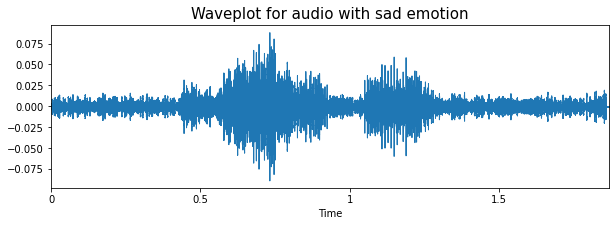

In [ ]:
audio_path = np.array(crema_df.Paths[crema_df.Emotions==0])[0]
data, sample_rate = librosa.load(audio_path)
visualize(data, sample_rate, "sad")
Audio(audio_path)

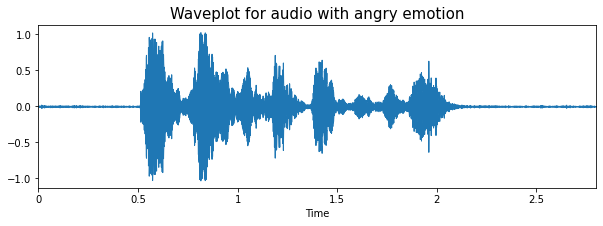

In [ ]:
audio_path = np.array(crema_df.Paths[crema_df.Emotions==1])[1]
data, sample_rate = librosa.load(audio_path)
visualize(data, sample_rate, "angry")
Audio(audio_path)

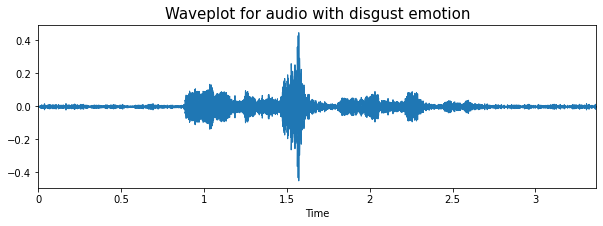

In [ ]:
audio_path = np.array(crema_df.Paths[crema_df.Emotions==2])[2]
data, sample_rate = librosa.load(audio_path)
visualize(data, sample_rate, "disgust")
Audio(audio_path)

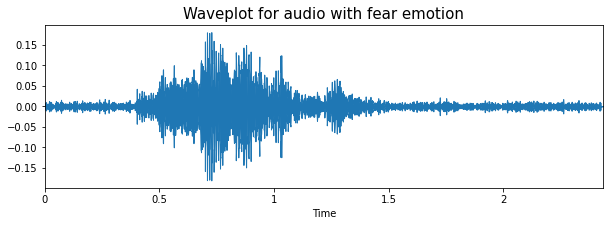

In [ ]:
audio_path = np.array(crema_df.Paths[crema_df.Emotions==3])[3]
data, sample_rate = librosa.load(audio_path)
visualize(data, sample_rate, "fear")
Audio(audio_path)

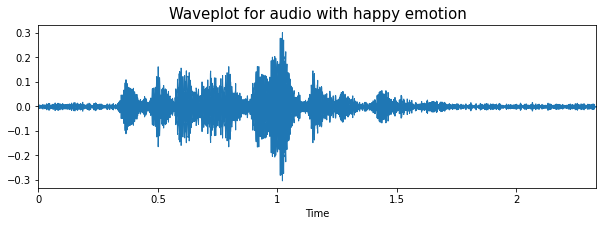

In [ ]:
audio_path = np.array(crema_df.Paths[crema_df.Emotions==4])[4]
data, sample_rate = librosa.load(audio_path)
visualize(data, sample_rate, "happy")
Audio(audio_path)

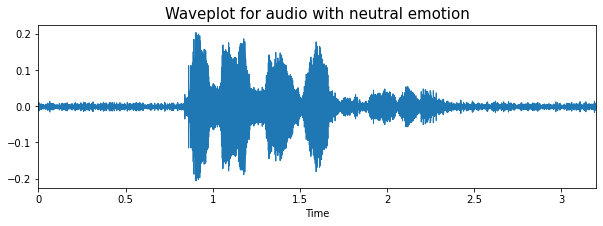

In [ ]:
audio_path = np.array(crema_df.Paths[crema_df.Emotions==5])[5]
data, sample_rate = librosa.load(audio_path)
visualize(data, sample_rate, "neutral")
Audio(audio_path)

In [ ]:
def LoadAudio2(Crema):
    emotions = []
    Audio_List=[]
    samp_freq=[]
    
    for wav in os.listdir(Crema):
        path=Crema+"/"+wav
        audio,sampling_freq=lr.load(path,sr=16000)
        yt, index = lr.effects.trim(audio, top_db=60)       
        
        if len(yt) > (3*16000):
            yt = yt[:3*16000]
        else:
            padding = (3*16000) - len(yt)
            offset = padding // 2
            yt = np.pad(yt, (offset,3*16000- len(yt) - offset), 'constant')

        mean = np.mean(yt)
        std = np.std(yt)
        out = np.ones( (len(yt)) ) 
        yt= np.divide((yt - mean),std,out=out, where=std!=0)

        Audio_List.append(yt)
        samp_freq.append(sampling_freq)

        info = wav.partition(".wav")[0].split("_")
        if info[2] == 'SAD':
            emotions.append(0)
        elif info[2] == 'ANG':
            emotions.append(1)
        elif info[2] == 'DIS':
            emotions.append(2)
        elif info[2] == 'FEA':
            emotions.append(3)
        elif info[2] == 'HAP':
            emotions.append(4)
        elif info[2] == 'NEU':
            emotions.append(5)
        else:
            emotions.append(6)
            
    return Audio_List,samp_freq,emotions

In [ ]:
train_data, test_data, labels_train1D, labels_test1D = train_test_split(Audio_List,Labels, test_size=0.30, random_state=42)
train_data,val_data, labels_train1D, labels_val1D = train_test_split(train_data,labels_train1D, test_size=0.05, random_state=42)
print(len(train_data))
print(len(val_data))
print(len(test_data))

4948
261
2233


In [ ]:
Audio_List2,samp_freq2,Labels2 =  LoadAudio2('Crema')

print(len(Audio_List2))
print(len(Labels2))

In [ ]:
train_data2, test_data2, labels_train1D2, labels_test1D2 = train_test_split(Audio_List2,Labels2, test_size=0.30, random_state=42)
train_data2,val_data2, labels_train1D2, labels_val1D2 = train_test_split(train_data2,labels_train1D2, test_size=0.05, random_state=42)
print(len(train_data2))
print(len(val_data2))
print(len(test_data2))

In [ ]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

In [ ]:
train_Aug=[]
for i in range(len(train_data2)):
  train_Aug.append(train_data2[i])

for i in range(len(train_data2)):
  noise_data = noise(train_data2[i])
  train_Aug.append(noise_data)
  labels_train1D2.append(labels_train1D2[i])

for i in range(len(train_data2)):
  shift_data = shift(train_data2[i])
  train_Aug.append(shift_data)
  labels_train1D2.append(labels_train1D2[i])

print(len(train_Aug))
print(len(labels_train1D2))
print(len(train_data2))

In [ ]:
def zcr(data, frame_length=1024, hop_length=512):
    zcr = lr.feature.zero_crossing_rate(y=data, frame_length=frame_length, hop_length=hop_length)

    return np.squeeze(zcr)

In [ ]:
def extract_features(Audio_List, samp_freq, frame_length=2048, hop_length=512, sr):
    result = np.array([])
    result = np.hstack((result,
                        zcr(Audio_List, frame_length, hop_length)))
    
    rms = np.mean(lr.feature.rms(y=Audio_List).T, axis=0)
    result = np.hstack((result, rms))

    stft = np.abs(lr.stft(Audio_List))
    chroma_stft = np.mean(lr.feature.chroma_stft(S=stft, sr=8000).T, axis=0)
    result = np.hstack((result, chroma_stft))

    mfcc = np.mean(lr.feature.mfcc(y=Audio_List, sr=8000).T, axis=0)
    result = np.hstack((result, mfcc))

    return result

In [ ]:
def extract_features2(Audio_List, samp_freq, frame_length=2048, hop_length=512):
    result = np.array([])
    result = np.hstack((result,
                        zcr(Audio_List, frame_length, hop_length)))
    
    rms = np.mean(lr.feature.rms(y=Audio_List).T, axis=0)
    result = np.hstack((result, rms))

    stft = np.abs(lr.stft(Audio_List))
    chroma_stft = np.mean(lr.feature.chroma_stft(S=stft, sr=16000).T, axis=0)
    result = np.hstack((result, chroma_stft))

    mfcc = np.mean(lr.feature.mfcc(y=Audio_List, sr=16000).T, axis=0)
    result = np.hstack((result, mfcc))

    return result

In [ ]:
features=[]
for i in range(len(train_data)):

    res1 = extract_features(train_data[i],8000)
    result = np.array(res1)
    features.append(result)

features_val=[]
for i in range(len(val_data)):

    res1 = extract_features(val_data[i],8000)
    result = np.array(res1)
    features_val.append(result)

features_test=[]
for i in range(len(test_data)):

    res1 = extract_features(test_data[i],8000)
    result = np.array(res1)
    features_test.append(result)

/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


In [ ]:
features = np.array(features)
features = features[:,:,np.newaxis]
print(features.shape)

features_val = np.array(features_val)
features_val = features_val[:,:,np.newaxis]
print(features_val.shape)

features_test = np.array(features_test)
features_test = features_test[:,:,np.newaxis]
print(features_test.shape)

In [ ]:
train_data = np.array(train_data)
train_data = train_data[:,:,np.newaxis]
print(train_data.shape)

val_data = np.array(val_data)
val_data = val_data[:,:,np.newaxis]
print(val_data.shape)

test_data = np.array(test_data)
test_data = test_data[:,:,np.newaxis]
print(test_data.shape)

(4948, 16000, 1)
(261, 16000, 1)
(2233, 16000, 1)


In [ ]:
final_train_aug = np.hstack((features, train_data))
final_train_aug = np.array(final_train_aug)
print(final_train_aug.shape)

final_val = np.hstack((features_val, val_data))
final_val = np.array(final_val)
print(final_val.shape)

final_test = np.hstack((features_test, test_data))
final_test = np.array(final_test)
print(final_test.shape)

In [ ]:
features_Aug=[]
for i in range(len(train_data)):

    res1 = extract_features2(train_data[i],16000)
    result = np.array(res1)
    features_Aug.append(result)

features_val2=[]
for i in range(len(val_data)):

    res1 = extract_features2(val_data[i],16000)
    result = np.array(res1)
    features_val2.append(result)

features_test2=[]
for i in range(len(test_data)):

    res1 = extract_features2(test_data[i],16000)
    result = np.array(res1)
    features_test2.append(result)

In [ ]:
import keras
from keras import layers
from keras.layers import Activation, Dense, Dropout, Conv2D, Conv1D, Flatten, MaxPooling2D, MaxPooling1D, BatchNormalization
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import model_from_json
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn import preprocessing
import tensorflow as tf


model=Sequential()
model.add(Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(features_Aug.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(features_Aug.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(features_Aug.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=6, activation='softmax'))
#opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer = 'adam' , loss = 'SparseCategoricalCrossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 108, 256)          1024      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 54, 256)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 54, 256)           196864    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 27, 256)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 27, 128)           98432     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 14, 128)          0

In [ ]:
from keras.callbacks import ReduceLROnPlateau

rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0001)
model_history = model.fit(np.array(features_Aug),np.array(labels_train1D),batch_size=128,epochs=100,validation_data=(np.array(features_val), np.array(labels_val1D)), callbacks=[rlrp])
score, acc = model.evaluate(np.array(features_val), np.array(labels_val1D), verbose=0)
print('Val accuracy:', acc)

Epoch 1/100
116/116 [==============================] - 17s 23ms/step - loss: 1.6989 - accuracy: 0.2685 - val_loss: 1.5387 - val_accuracy: 0.4023 - lr: 0.0010
Epoch 2/100
116/116 [==============================] - 1s 9ms/step - loss: 1.5669 - accuracy: 0.3499 - val_loss: 1.4981 - val_accuracy: 0.4023 - lr: 0.0010
Epoch 3/100
116/116 [==============================] - 1s 9ms/step - loss: 1.5249 - accuracy: 0.3748 - val_loss: 1.5132 - val_accuracy: 0.3678 - lr: 0.0010
Epoch 4/100
116/116 [==============================] - 1s 10ms/step - loss: 1.5037 - accuracy: 0.3864 - val_loss: 1.4657 - val_accuracy: 0.4483 - lr: 0.0010
Epoch 5/100
116/116 [==============================] - 1s 9ms/step - loss: 1.4888 - accuracy: 0.3928 - val_loss: 1.4208 - val_accuracy: 0.4291 - lr: 0.0010
Epoch 6/100
116/116 [==============================] - 1s 10ms/step - loss: 1.4789 - accuracy: 0.3977 - val_loss: 1.4284 - val_accuracy: 0.4330 - lr: 0.0010
Epoch 7/100
116/116 [==============================] - 1s 9m

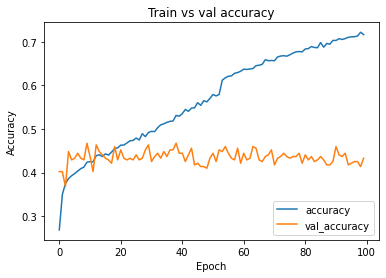

In [ ]:
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title("Train vs val accuracy")
plt.savefig('Initial_Model_Accuracy.png')
plt.show()

              precision    recall  f1-score   support

           0       0.44      0.53      0.48       358
           1       0.60      0.63      0.62       400
           2       0.46      0.42      0.44       411
           3       0.37      0.29      0.32       394
           4       0.39      0.44      0.41       373
           5       0.45      0.43      0.44       297

    accuracy                           0.46      2233
   macro avg       0.45      0.46      0.45      2233
weighted avg       0.45      0.46      0.45      2233



val accuracy: 43.29501986503601
train accuracy: 81.67609572410583
test accuracy 45.63367666815943




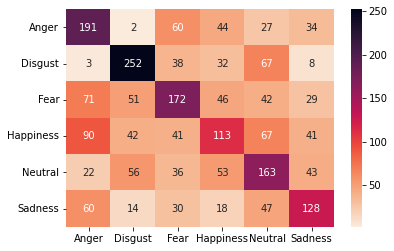

In [ ]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
score, trainacc = model.evaluate(np.array(features_Aug), np.array(labels_train1D), verbose=0)
y_pred = model.predict(features_test)
report=metrics.classification_report(labels_test1D,np.argmax(y_pred,axis=1)) 
print(report)
matrix = metrics.confusion_matrix(labels_test1D ,np.argmax(y_pred,axis=1))
ax = sns.heatmap(matrix, annot=True, fmt="d", cmap = 'rocket_r', xticklabels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'], yticklabels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'])

print("\n")
print('val accuracy:', acc*100)
print('train accuracy:', trainacc*100)
print("test accuracy",metrics.accuracy_score(labels_test1D,np.argmax(y_pred,axis=1))*100)
print("\n")

In [ ]:
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

model = tf.keras.Sequential()
model.add(layers.Conv1D(512, kernel_size=(7), activation='relu',strides=1,use_bias=True,bias_initializer="zeros", input_shape=(features_Aug.shape[1],1)))
model.add(layers.MaxPooling1D(pool_size=(5),strides=2))
model.add(layers.Dropout(0.4))

model.add(layers.Conv1D(512, kernel_size=(5), activation='relu',strides=1,use_bias=True,bias_initializer="zeros", input_shape=(features_Aug.shape[1],1)))
model.add(layers.MaxPooling1D(pool_size=(5),strides=2))
model.add(layers.Dropout(0.4))

model.add(layers.Conv1D(128, kernel_size=(3), activation='relu',strides=1,use_bias=True,bias_initializer="zeros", input_shape=(features_Aug.shape[1],1)))
model.add(layers.MaxPooling1D(pool_size=(5),strides=2))
model.add(layers.Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))

model.add(layers.Dense(6, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt ,metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 102, 512)          4096      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 49, 512)          0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 49, 512)           0         
                                                                 
 conv1d_4 (Conv1D)           (None, 45, 512)           1311232   
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 21, 512)          0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 21, 512)          

In [ ]:
from keras.callbacks import ReduceLROnPlateau

rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0001)
model_history = model.fit(np.array(features_Aug),np.array(labels_train1D),batch_size=32,epochs=200,validation_data=(np.array(features_val), np.array(labels_val1D)), callbacks=[rlrp])
score, acc = model.evaluate(np.array(features_val), np.array(labels_val1D), verbose=0)
print('\nVal accuracy:', acc)

Epoch 1/200
464/464 [==============================] - 5s 10ms/step - loss: 1.7714 - accuracy: 0.2094 - val_loss: 1.7470 - val_accuracy: 0.2490 - lr: 1.0000e-04
Epoch 2/200
464/464 [==============================] - 4s 8ms/step - loss: 1.7159 - accuracy: 0.2654 - val_loss: 1.6375 - val_accuracy: 0.3372 - lr: 1.0000e-04
Epoch 3/200
464/464 [==============================] - 4s 8ms/step - loss: 1.6486 - accuracy: 0.3067 - val_loss: 1.5738 - val_accuracy: 0.3602 - lr: 1.0000e-04
Epoch 4/200
464/464 [==============================] - 4s 9ms/step - loss: 1.6106 - accuracy: 0.3340 - val_loss: 1.5369 - val_accuracy: 0.4253 - lr: 1.0000e-04
Epoch 5/200
464/464 [==============================] - 4s 8ms/step - loss: 1.5858 - accuracy: 0.3425 - val_loss: 1.5202 - val_accuracy: 0.4291 - lr: 1.0000e-04
Epoch 6/200
464/464 [==============================] - 4s 8ms/step - loss: 1.5733 - accuracy: 0.3488 - val_loss: 1.5017 - val_accuracy: 0.4215 - lr: 1.0000e-04
Epoch 7/200
464/464 [==================

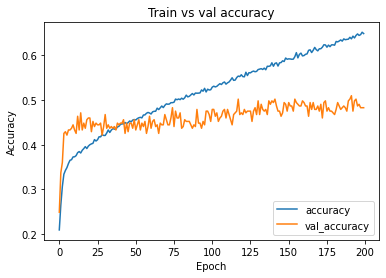

In [ ]:
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title("Train vs val accuracy")
plt.savefig('Initial_Model_Accuracy.png')
plt.show()

              precision    recall  f1-score   support

           0       0.48      0.54      0.51       358
           1       0.57      0.68      0.62       400
           2       0.46      0.45      0.46       411
           3       0.39      0.26      0.31       394
           4       0.43      0.35      0.38       373
           5       0.42      0.53      0.47       297

    accuracy                           0.47      2233
   macro avg       0.46      0.47      0.46      2233
weighted avg       0.46      0.47      0.46      2233



val accuracy: 48.27586114406586
train accuracy: 79.2845606803894
test accuracy 46.75324675324675




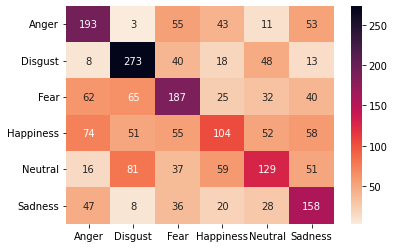

In [ ]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
score, trainacc = model.evaluate(np.array(features_Aug), np.array(labels_train1D), verbose=0)
y_pred = model.predict(features_test)
report=metrics.classification_report(labels_test1D,np.argmax(y_pred,axis=1)) 
print(report)
matrix = metrics.confusion_matrix(labels_test1D ,np.argmax(y_pred,axis=1))
ax = sns.heatmap(matrix, annot=True, fmt="d", cmap = 'rocket_r', xticklabels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'], yticklabels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'])

print("\n")
print('val accuracy:', acc*100)
print('train accuracy:', trainacc*100)
print("test accuracy",metrics.accuracy_score(labels_test1D,np.argmax(y_pred,axis=1))*100)
print("\n")

In [ ]:
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

model = tf.keras.Sequential()
model.add(layers.Conv1D(512, kernel_size=(7), activation='relu',strides=1,use_bias=True,bias_initializer="zeros", input_shape=(features_Aug.shape[1],1)))
model.add(layers.MaxPooling1D(pool_size=(5),strides=2))
model.add(layers.Dropout(0.4))

model.add(layers.Conv1D(512, kernel_size=(5), activation='relu',strides=1,use_bias=True,bias_initializer="zeros", input_shape=(features_Aug.shape[1],1)))
model.add(layers.MaxPooling1D(pool_size=(5),strides=2))
model.add(layers.Dropout(0.4))

model.add(layers.Conv1D(128, kernel_size=(3), activation='relu',strides=1,use_bias=True,bias_initializer="zeros", input_shape=(features_Aug.shape[1],1)))
model.add(layers.MaxPooling1D(pool_size=(5),strides=2))
model.add(layers.Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))

model.add(layers.Dense(6, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt ,metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 121, 512)          4096      
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 59, 512)          0         
 1D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 59, 512)           0         
                                                                 
 conv1d_10 (Conv1D)          (None, 55, 512)           1311232   
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 26, 512)          0         
 g1D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 26, 512)          

In [ ]:
from keras.callbacks import ReduceLROnPlateau

rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=20, min_lr=0.000001)
model_history = model.fit(np.array(features_Aug),np.array(labels_train1D),batch_size=32,epochs=200,validation_data=(np.array(features_val), np.array(labels_val1D)), callbacks=[rlrp])
score, acc = model.evaluate(np.array(features_val), np.array(labels_val1D), verbose=0)
print('\nVal accuracy:', acc)

Epoch 1/200
310/310 [==============================] - 9s 24ms/step - loss: 1.9497 - accuracy: 0.1940 - val_loss: 1.7464 - val_accuracy: 0.2874 - lr: 1.0000e-04
Epoch 2/200
310/310 [==============================] - 7s 21ms/step - loss: 1.7718 - accuracy: 0.2159 - val_loss: 1.7131 - val_accuracy: 0.3257 - lr: 1.0000e-04
Epoch 3/200
310/310 [==============================] - 7s 21ms/step - loss: 1.7314 - accuracy: 0.2391 - val_loss: 1.6767 - val_accuracy: 0.2989 - lr: 1.0000e-04
Epoch 4/200
310/310 [==============================] - 6s 21ms/step - loss: 1.6952 - accuracy: 0.2712 - val_loss: 1.6543 - val_accuracy: 0.3448 - lr: 1.0000e-04
Epoch 5/200
310/310 [==============================] - 7s 21ms/step - loss: 1.6692 - accuracy: 0.2877 - val_loss: 1.6097 - val_accuracy: 0.4061 - lr: 1.0000e-04
Epoch 6/200
310/310 [==============================] - 7s 21ms/step - loss: 1.6357 - accuracy: 0.3059 - val_loss: 1.6019 - val_accuracy: 0.3333 - lr: 1.0000e-04
Epoch 7/200
310/310 [=============

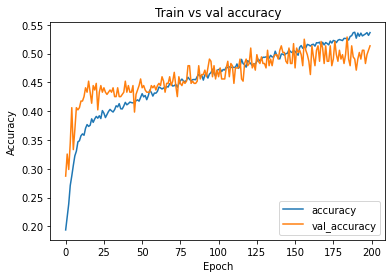

In [ ]:
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title("Train vs val accuracy")
plt.savefig('Initial_Model_Accuracy.png')
plt.show()

              precision    recall  f1-score   support

           0       0.51      0.59      0.54       358
           1       0.62      0.69      0.65       400
           2       0.48      0.42      0.45       411
           3       0.41      0.24      0.30       394
           4       0.45      0.42      0.43       373
           5       0.39      0.58      0.47       297

    accuracy                           0.48      2233
   macro avg       0.48      0.49      0.47      2233
weighted avg       0.48      0.48      0.47      2233



val accuracy: 51.34099721908569
train accuracy: 60.701292753219604
test accuracy 48.3654276757725




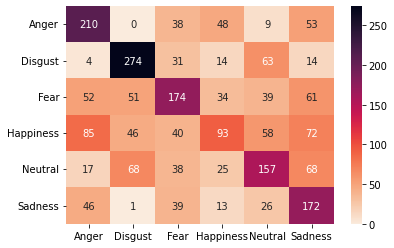

In [ ]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
score, trainacc = model.evaluate(np.array(features_Aug), np.array(labels_train1D), verbose=0)
y_pred = model.predict(features_test)
report=metrics.classification_report(labels_test1D,np.argmax(y_pred,axis=1)) 
print(report)
matrix = metrics.confusion_matrix(labels_test1D ,np.argmax(y_pred,axis=1))
ax = sns.heatmap(matrix, annot=True, fmt="d", cmap = 'rocket_r', xticklabels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'], yticklabels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'])

print("\n")
print('val accuracy:', acc*100)
print('train accuracy:', trainacc*100)
print("test accuracy",metrics.accuracy_score(labels_test1D,np.argmax(y_pred,axis=1))*100)
print("\n")

In [ ]:
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

model = tf.keras.Sequential()
model.add(layers.Conv1D(512, kernel_size=(5), activation='relu',strides=1,use_bias=True,bias_initializer="zeros",kernel_regularizer=l2(0), input_shape=(final_train_aug.shape[1],1)))
model.add(layers.MaxPooling1D(pool_size=(5),strides=2))
model.add(layers.Dropout(0.4))

model.add(layers.Conv1D(512, kernel_size=(5), activation='relu',strides=1,use_bias=True,bias_initializer="zeros",kernel_regularizer=l2(0), input_shape=(final_train_aug.shape[1],1)))
model.add(layers.MaxPooling1D(pool_size=(5),strides=2))
model.add(layers.Dropout(0.4))

model.add(layers.Conv1D(128, kernel_size=(5), activation='relu',strides=1,use_bias=True,bias_initializer="zeros",kernel_regularizer=l2(0), input_shape=(final_train_aug.shape[1],1)))
model.add(layers.MaxPooling1D(pool_size=(5),strides=2))
model.add(layers.Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.4))

model.add(layers.Dense(6, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt ,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 16061, 512)        3072      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 8029, 512)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 8029, 512)         0         
                                                                 
 conv1d_1 (Conv1D)           (None, 8025, 512)         1311232   
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 4011, 512)        0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 4011, 512)         0

In [ ]:
from keras.callbacks import ReduceLROnPlateau

rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0001)
model_history = model.fit(np.array(final_train_aug),np.array(labels_train1D),batch_size=32,epochs=50,validation_data=(np.array(final_val), np.array(labels_val1D)), callbacks=[rlrp])
score, acc = model.evaluate(np.array(final_val), np.array(labels_val1D), verbose=0)
print('\nVal accuracy:', acc)

Epoch 1/50
155/155 [==============================] - 242s 2s/step - loss: 1.5577 - accuracy: 0.3709 - val_loss: 1.5068 - val_accuracy: 0.4176 - lr: 1.0000e-04
Epoch 2/50
155/155 [==============================] - 243s 2s/step - loss: 1.5048 - accuracy: 0.3939 - val_loss: 1.5050 - val_accuracy: 0.4406 - lr: 1.0000e-04
Epoch 3/50
155/155 [==============================] - 243s 2s/step - loss: 1.4285 - accuracy: 0.4270 - val_loss: 1.4517 - val_accuracy: 0.4368 - lr: 1.0000e-04
Epoch 4/50
155/155 [==============================] - 242s 2s/step - loss: 1.3674 - accuracy: 0.4616 - val_loss: 1.3901 - val_accuracy: 0.4483 - lr: 1.0000e-04
Epoch 5/50
155/155 [==============================] - 241s 2s/step - loss: 1.2940 - accuracy: 0.4881 - val_loss: 1.4276 - val_accuracy: 0.4215 - lr: 1.0000e-04
Epoch 6/50
155/155 [==============================] - 241s 2s/step - loss: 1.1894 - accuracy: 0.5461 - val_loss: 1.4309 - val_accuracy: 0.4215 - lr: 1.0000e-04
Epoch 7/50
155/155 [====================

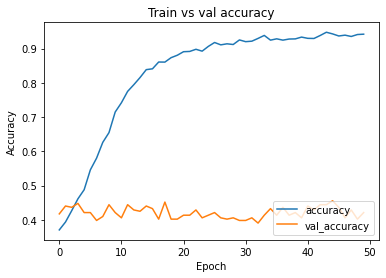

In [ ]:
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title("Train vs val accuracy")
plt.savefig('Initial_Model_Accuracy.png')
plt.show()

              precision    recall  f1-score   support

           0       0.44      0.44      0.44       386
           1       0.53      0.71      0.61       403
           2       0.30      0.37      0.33       385
           3       0.33      0.20      0.25       383
           4       0.27      0.23      0.25       373
           5       0.35      0.34      0.35       303

    accuracy                           0.39      2233
   macro avg       0.37      0.38      0.37      2233
weighted avg       0.37      0.39      0.37      2233



val accuracy: 42.14559495449066
train accuracy: 99.91915822029114
test accuracy 38.60277653381102




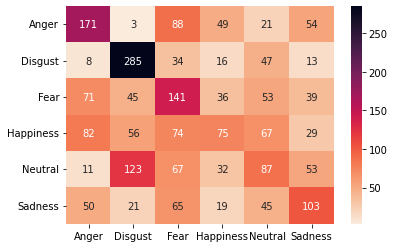

In [ ]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
score, trainacc = model.evaluate(np.array(final_train_aug), np.array(labels_train1D), verbose=0)
y_pred = model.predict(final_test)
report=metrics.classification_report(labels_test1D,np.argmax(y_pred,axis=1)) 
print(report)
matrix = metrics.confusion_matrix(labels_test1D ,np.argmax(y_pred,axis=1))
ax = sns.heatmap(matrix, annot=True, fmt="d", cmap = 'rocket_r', xticklabels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'], yticklabels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'])

print("\n")
print('val accuracy:', acc*100)
print('train accuracy:', trainacc*100)
print("test accuracy",metrics.accuracy_score(labels_test1D,np.argmax(y_pred,axis=1))*100)
print("\n")

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Conv1D(512, kernel_size=(5), activation='relu',strides=1,use_bias=True,bias_initializer="zeros",kernel_regularizer=l2(0), input_shape=(features_Aug.shape[1],1)))
model.add(layers.MaxPooling1D(pool_size=(5),strides=2))
model.add(layers.Dropout(0.4))

model.add(layers.Conv1D(512, kernel_size=(3), activation='relu',strides=1,use_bias=True,bias_initializer="zeros",kernel_regularizer=l2(0), input_shape=(features_Aug.shape[1],1)))
model.add(layers.MaxPooling1D(pool_size=(5),strides=2))
model.add(layers.Dropout(0.4))

model.add(layers.Conv1D(128, kernel_size=(3), activation='relu',strides=1,use_bias=True,bias_initializer="zeros",kernel_regularizer=l2(0), input_shape=(features_Aug.shape[1],1)))
model.add(layers.MaxPooling1D(pool_size=(5),strides=2))
model.add(layers.Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))

model.add(layers.Dense(6, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt ,metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 123, 512)          3072      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 60, 512)          0         
 1D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 60, 512)           0         
                                                                 
 conv1d_6 (Conv1D)           (None, 58, 512)           786944    
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 27, 512)          0         
 1D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 27, 512)          

In [ ]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', verbose=1, patience=50)
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0001)
model_history = model.fit(np.array(features_Aug),np.array(labels_train1D2),batch_size=32,epochs=200,validation_data=(np.array(features_val2), np.array(labels_val1D2)), callbacks=[rlrp,es])
score, acc = model.evaluate(np.array(features_val2), np.array(labels_val1D2), verbose=0)
print('\nVal accuracy:', acc)

Epoch 1/200
464/464 [==============================] - 12s 25ms/step - loss: 1.9992 - accuracy: 0.1998 - val_loss: 1.7460 - val_accuracy: 0.2490 - lr: 1.0000e-04
Epoch 2/200
464/464 [==============================] - 11s 24ms/step - loss: 1.7506 - accuracy: 0.2239 - val_loss: 1.6952 - val_accuracy: 0.2644 - lr: 1.0000e-04
Epoch 3/200
464/464 [==============================] - 11s 24ms/step - loss: 1.7030 - accuracy: 0.2594 - val_loss: 1.6689 - val_accuracy: 0.2950 - lr: 1.0000e-04
Epoch 4/200
464/464 [==============================] - 11s 24ms/step - loss: 1.6525 - accuracy: 0.2966 - val_loss: 1.5974 - val_accuracy: 0.3563 - lr: 1.0000e-04
Epoch 5/200
464/464 [==============================] - 11s 24ms/step - loss: 1.6087 - accuracy: 0.3242 - val_loss: 1.5412 - val_accuracy: 0.3908 - lr: 1.0000e-04
Epoch 6/200
464/464 [==============================] - 11s 24ms/step - loss: 1.5846 - accuracy: 0.3374 - val_loss: 1.5694 - val_accuracy: 0.3372 - lr: 1.0000e-04
Epoch 7/200
464/464 [=======

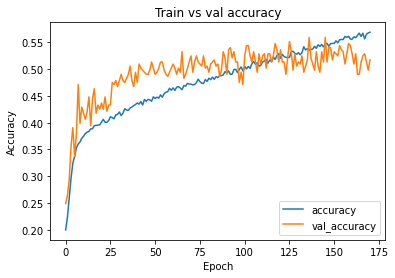

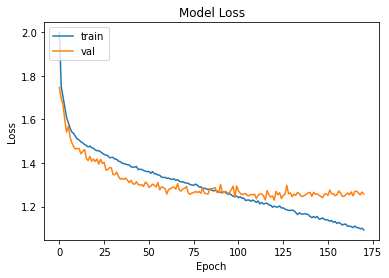

In [ ]:
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title("Train vs val accuracy")
plt.savefig('Initial_Model_Accuracy.png')
plt.show()

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('Initial_Model_loss.png')
plt.show()

              precision    recall  f1-score   support

           0       0.53      0.50      0.52       407
           1       0.62      0.70      0.66       379
           2       0.51      0.36      0.42       371
           3       0.40      0.29      0.34       378
           4       0.41      0.45      0.43       381
           5       0.42      0.60      0.49       317

    accuracy                           0.48      2233
   macro avg       0.48      0.49      0.48      2233
weighted avg       0.48      0.48      0.48      2233



val accuracy: 51.724135875701904
train accuracy: 66.45109057426453
test accuracy 48.275862068965516




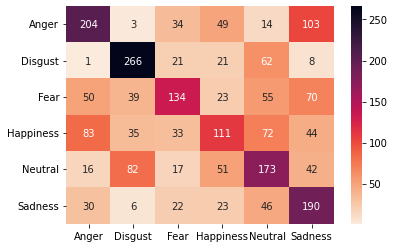

In [ ]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
score, trainacc = model.evaluate(np.array(features_Aug), np.array(labels_train1D2), verbose=0)
y_pred = model.predict(features_test2)
report=metrics.classification_report(labels_test1D2,np.argmax(y_pred,axis=1)) 
print(report)
matrix = metrics.confusion_matrix(labels_test1D2 ,np.argmax(y_pred,axis=1))
ax = sns.heatmap(matrix, annot=True, fmt="d", cmap = 'rocket_r', xticklabels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'], yticklabels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'])

print("\n")
print('val accuracy:', acc*100)
print('train accuracy:', trainacc*100)
print("test accuracy",metrics.accuracy_score(labels_test1D2,np.argmax(y_pred,axis=1))*100)
print("\n")

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Conv1D(512, kernel_size=(7), activation='relu',strides=1,use_bias=True,bias_initializer="zeros",kernel_regularizer=l2(0), input_shape=(features_Aug.shape[1],1)))
model.add(layers.MaxPooling1D(pool_size=(5),strides=2))
model.add(layers.Dropout(0.4))

model.add(layers.Conv1D(512, kernel_size=(5), activation='relu',strides=1,use_bias=True,bias_initializer="zeros",kernel_regularizer=l2(0), input_shape=(features_Aug.shape[1],1)))
model.add(layers.MaxPooling1D(pool_size=(5),strides=2))
model.add(layers.Dropout(0.4))

model.add(layers.Conv1D(128, kernel_size=(3), activation='relu',strides=1,use_bias=True,bias_initializer="zeros",kernel_regularizer=l2(0), input_shape=(features_Aug.shape[1],1)))
model.add(layers.MaxPooling1D(pool_size=(5),strides=2))
model.add(layers.Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))

model.add(layers.Dense(6, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt ,metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 121, 512)          4096      
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 59, 512)          0         
 1D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 59, 512)           0         
                                                                 
 conv1d_9 (Conv1D)           (None, 55, 512)           1311232   
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 26, 512)          0         
 1D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 26, 512)          

In [ ]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', verbose=1, patience=50)
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0001)
model_history = model.fit(np.array(features_Aug),np.array(labels_train1D2),batch_size=32,epochs=200,validation_data=(np.array(features_val2), np.array(labels_val1D2)), callbacks=[rlrp,es])
score, acc = model.evaluate(np.array(features_val2), np.array(labels_val1D2), verbose=0)
print('\nVal accuracy:', acc)

Epoch 1/200
464/464 [==============================] - 18s 32ms/step - loss: 1.8898 - accuracy: 0.2051 - val_loss: 1.7334 - val_accuracy: 0.2222 - lr: 1.0000e-04
Epoch 2/200
464/464 [==============================] - 14s 29ms/step - loss: 1.7266 - accuracy: 0.2504 - val_loss: 1.6615 - val_accuracy: 0.3257 - lr: 1.0000e-04
Epoch 3/200
464/464 [==============================] - 14s 29ms/step - loss: 1.6771 - accuracy: 0.2787 - val_loss: 1.6485 - val_accuracy: 0.3448 - lr: 1.0000e-04
Epoch 4/200
464/464 [==============================] - 14s 29ms/step - loss: 1.6317 - accuracy: 0.3126 - val_loss: 1.5861 - val_accuracy: 0.3908 - lr: 1.0000e-04
Epoch 5/200
464/464 [==============================] - 14s 29ms/step - loss: 1.5886 - accuracy: 0.3359 - val_loss: 1.5589 - val_accuracy: 0.4138 - lr: 1.0000e-04
Epoch 6/200
464/464 [==============================] - 14s 29ms/step - loss: 1.5631 - accuracy: 0.3444 - val_loss: 1.5411 - val_accuracy: 0.3831 - lr: 1.0000e-04
Epoch 7/200
464/464 [=======

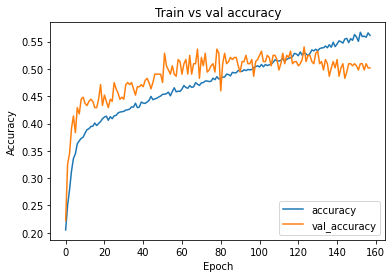

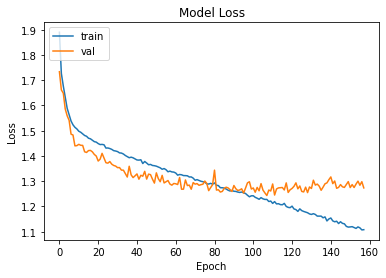

In [ ]:
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title("Train vs val accuracy")
plt.savefig('Initial_Model_Accuracy.png')
plt.show()

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('Initial_Model_loss.png')
plt.show()

              precision    recall  f1-score   support

           0       0.50      0.57      0.54       407
           1       0.63      0.73      0.67       379
           2       0.49      0.45      0.47       371
           3       0.43      0.24      0.31       378
           4       0.40      0.36      0.38       381
           5       0.40      0.56      0.47       317

    accuracy                           0.48      2233
   macro avg       0.48      0.48      0.47      2233
weighted avg       0.48      0.48      0.47      2233



val accuracy: 50.191569328308105
train accuracy: 64.61870074272156
test accuracy 48.32064487236901




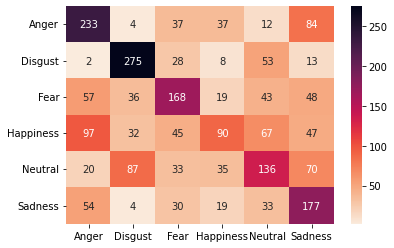

In [ ]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
score, trainacc = model.evaluate(np.array(features_Aug), np.array(labels_train1D2), verbose=0)
y_pred = model.predict(features_test2)
report=metrics.classification_report(labels_test1D2,np.argmax(y_pred,axis=1)) 
print(report)
matrix = metrics.confusion_matrix(labels_test1D2 ,np.argmax(y_pred,axis=1))
ax = sns.heatmap(matrix, annot=True, fmt="d", cmap = 'rocket_r', xticklabels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'], yticklabels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'])

print("\n")
print('val accuracy:', acc*100)
print('train accuracy:', trainacc*100)
print("test accuracy",metrics.accuracy_score(labels_test1D2,np.argmax(y_pred,axis=1))*100)
print("\n")

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Conv1D(512, kernel_size=(5), activation='relu',strides=1,use_bias=True,bias_initializer="zeros",kernel_regularizer=l2(0), input_shape=(features_Aug.shape[1],1)))
model.add(layers.MaxPooling1D(pool_size=(5),strides=2))
model.add(layers.Dropout(0.4))

model.add(layers.Conv1D(512, kernel_size=(5), activation='relu',strides=1,use_bias=True,bias_initializer="zeros",kernel_regularizer=l2(0), input_shape=(features_Aug.shape[1],1)))
model.add(layers.MaxPooling1D(pool_size=(5),strides=2))
model.add(layers.Dropout(0.4))

model.add(layers.Conv1D(128, kernel_size=(3), activation='relu',strides=1,use_bias=True,bias_initializer="zeros",kernel_regularizer=l2(0), input_shape=(features_Aug.shape[1],1)))
model.add(layers.MaxPooling1D(pool_size=(5),strides=2))
model.add(layers.Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))

model.add(layers.Dense(6, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt ,metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 123, 512)          3072      
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 60, 512)          0         
 g1D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 60, 512)           0         
                                                                 
 conv1d_15 (Conv1D)          (None, 56, 512)           1311232   
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 26, 512)          0         
 g1D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 26, 512)          

In [ ]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', verbose=1, patience=50)
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.00001)
model_history = model.fit(np.array(features_Aug),np.array(labels_train1D2),batch_size=32,epochs=200,validation_data=(np.array(features_val2), np.array(labels_val1D2)), callbacks=[rlrp,es])
score, acc = model.evaluate(np.array(features_val2), np.array(labels_val1D2), verbose=0)
print('\nVal accuracy:', acc)

Epoch 1/200
464/464 [==============================] - 15s 30ms/step - loss: 1.8972 - accuracy: 0.2016 - val_loss: 1.7419 - val_accuracy: 0.2414 - lr: 1.0000e-04
Epoch 2/200
464/464 [==============================] - 14s 30ms/step - loss: 1.7267 - accuracy: 0.2538 - val_loss: 1.6876 - val_accuracy: 0.3333 - lr: 1.0000e-04
Epoch 3/200
464/464 [==============================] - 14s 30ms/step - loss: 1.6639 - accuracy: 0.2939 - val_loss: 1.6099 - val_accuracy: 0.3640 - lr: 1.0000e-04
Epoch 4/200
464/464 [==============================] - 14s 30ms/step - loss: 1.6192 - accuracy: 0.3197 - val_loss: 1.5709 - val_accuracy: 0.3831 - lr: 1.0000e-04
Epoch 5/200
464/464 [==============================] - 14s 30ms/step - loss: 1.5882 - accuracy: 0.3371 - val_loss: 1.5254 - val_accuracy: 0.4215 - lr: 1.0000e-04
Epoch 6/200
464/464 [==============================] - 14s 30ms/step - loss: 1.5620 - accuracy: 0.3527 - val_loss: 1.5164 - val_accuracy: 0.3946 - lr: 1.0000e-04
Epoch 7/200
464/464 [=======

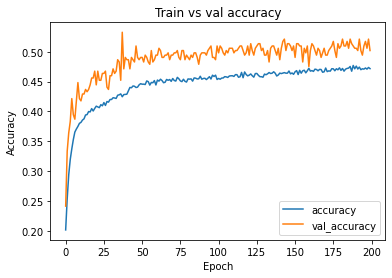

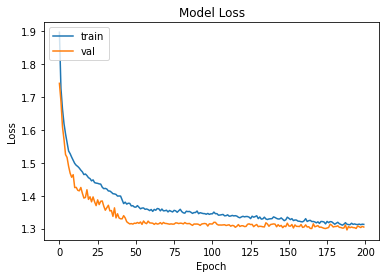

In [ ]:
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title("Train vs val accuracy")
plt.savefig('Initial_Model_Accuracy.png')
plt.show()

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('Initial_Model_loss.png')
plt.show()

              precision    recall  f1-score   support

           0       0.53      0.57      0.55       407
           1       0.61      0.64      0.63       379
           2       0.44      0.38      0.41       371
           3       0.41      0.19      0.26       378
           4       0.37      0.34      0.35       381
           5       0.38      0.65      0.48       317

    accuracy                           0.46      2233
   macro avg       0.45      0.46      0.44      2233
weighted avg       0.46      0.46      0.44      2233



val accuracy: 50.191569328308105
train accuracy: 49.57558512687683
test accuracy 45.812807881773395




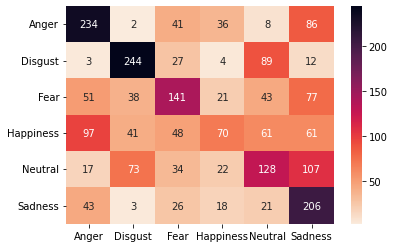

In [ ]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
score, trainacc = model.evaluate(np.array(features_Aug), np.array(labels_train1D2), verbose=0)
y_pred = model.predict(features_test2)
report=metrics.classification_report(labels_test1D2,np.argmax(y_pred,axis=1)) 
print(report)
matrix = metrics.confusion_matrix(labels_test1D2 ,np.argmax(y_pred,axis=1))
ax = sns.heatmap(matrix, annot=True, fmt="d", cmap = 'rocket_r', xticklabels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'], yticklabels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'])

print("\n")
print('val accuracy:', acc*100)
print('train accuracy:', trainacc*100)
print("test accuracy",metrics.accuracy_score(labels_test1D2,np.argmax(y_pred,axis=1))*100)
print("\n")